In [2]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

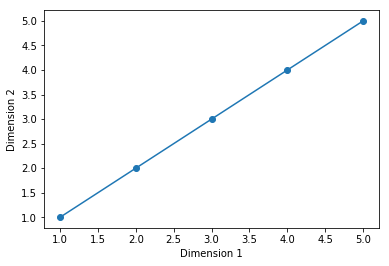

In [3]:
X = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])

x1 = X[:,0]
x2 = X[:,1]
plt.scatter(x1, x2)
plt.plot(x1, x2)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [4]:
#We can see that all information about X can be represented in a single dimension.
#We will find the orthogonal vectors along which most information about X is represented.
#From the graph, we can make a guess that the vector that we will find is u1 = [1, 1]
#Since in this case u1 vector captures all the informtion about the points, the other vector should have an eigen value of 0
#λ2 = 0

In [8]:
#Center dimensions of X
mu = np.mean(X, axis=0)
X = X - mu

In [9]:
covariance_matrix = np.dot(X.T, X) / (float)(len(X))
w, v = eig(covariance_matrix)

In [10]:
print w
print v

[4.0000000e+00 4.4408921e-16]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


To translate the original set of points to 1D, we project the points along the "primary" eigen vector direction. (With the highest eigen value)

λ1 = 22, λ2 = 0

u1 = v[:,0]

u2 = v[:,1]


        

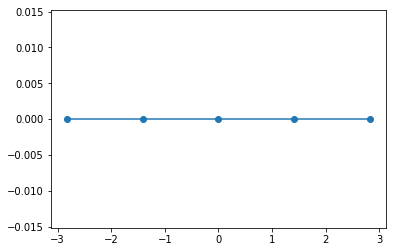

In [11]:
U = v[:, 0]
Y = np.dot(X, U)

plt.scatter(Y, np.zeros(len(Y)))
plt.plot(Y, np.zeros(len(Y)))

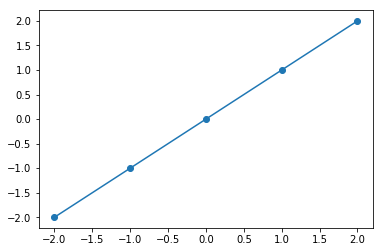

In [12]:
#Now translating back
X_dash = np.dot(Y[:, None], U[:, None].T)
plt.scatter(X_dash[:,0], X_dash[:,1])
plt.plot(X_dash[:,0], X_dash[:,1])

[4.00513898 0.00519702]
[[ 0.71579199 -0.69831355]
 [ 0.69831355  0.71579199]]


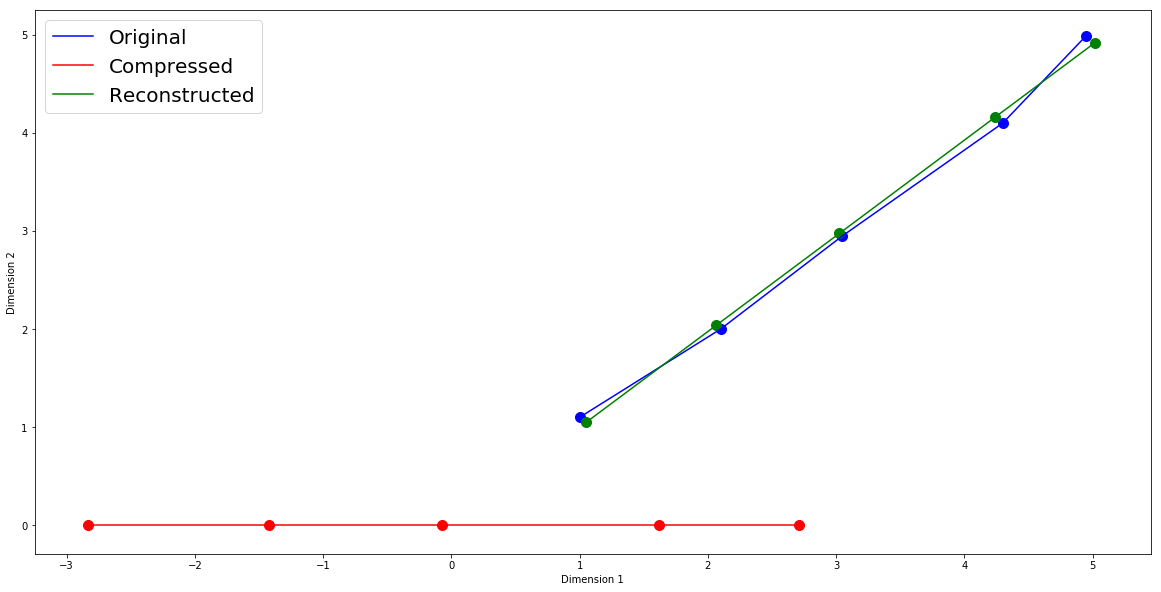

In [14]:
#Lets try another example where the input cannot be completely represented in a lower dimension

X = np.array([[1,1.1], [2.1,2], [3.05,2.95], [4.3,4.1], [4.95,4.99]])

x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(20,10))

plt.scatter(x1, x2, s=100, c='b')
plt.plot(x1, x2, c='b', label='Original')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
mu = np.mean(X, axis=0)
X = X - mu
covariance_matrix = np.dot(X.T, X) / (float)(len(X))
w, v = eig(covariance_matrix)

print w
print v

U = v[:, 0]
Y = np.dot(X, U)

plt.scatter(Y, np.zeros(len(Y)), c='r', s=100)
plt.plot(Y, np.zeros(len(Y)), c='r', label='Compressed')

#Now translating back

X_dash = np.dot(Y[:, None], U[:, None].T) + mu
plt.scatter(X_dash[:,0], X_dash[:,1], s=100, c='g')
plt.plot(X_dash[:,0], X_dash[:,1], c='g', label='Reconstructed')
plt.legend(prop={'size': 20})


In [9]:
#Up next: Try 3d plots